# 1. Perkenalan
================================================\
Milestone 2 (Phase 1)\
Phase 1

Nama: Yobi Aditias\
Batch: 008\
Program: FTDS\
Lokasi: Pondok Indah\
\================================================

## 1.1 Object Assignment & Context Dataset

Dataset Kali ini membahas mengenai user dari e-commerce. Objectnya ialah untuk mendeteksi apakah customer akan melakukan churn atau tidak, sehingga pada customer yang akan melakukan Churn dan tidak melakukan Churn akan diberikan treatment yang berbeda sesuai evaluasi dari hasil analisis.

# 2. Import Libraries

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle

In [100]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 3. Data Loading

## 3.1 Import Data

Proses download dilakukan secara manual di web, namun file excelnya sudah tersimpan di folder ini

In [53]:
data = pd.read_csv('E Commerce Dataset - E Comm.csv')
df = data.copy()

In [54]:
df = data.copy()

## 3.2 Menampilkan Data

In [55]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [56]:
df.tail(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,234
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


## 3.3 Chek Kolom

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [58]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## 3.4 Chek Missing Value

### 3.3.1 chek missing value pada keseluruhan data


In [59]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [60]:
indeks_missing = df[df.isnull().any(axis=1)].index
print('jumlah data entry :',len(indeks_missing), 'baris')

jumlah data entry : 1856 baris


Diketahui bahwa jumlah baris yang didalamnya terdapat missing value pada kolomnya berjumlah 1.856 baris 

### 3.3.2 Chek missing value pada kolom Tenure

In [61]:
a = df.loc[df['Tenure'].isnull()].index
df['Churn'].loc[a].value_counts()

Churn
0    183
1     81
Name: count, dtype: int64

In [62]:
b = df.loc[df['Tenure'] ==0.].index
df['Churn'].loc[b].value_counts()

Churn
1    272
0    236
Name: count, dtype: int64

Tidak ada pattern yang menunjukan adanya tanda-tanda bahwa missing value dari kolom tenure merupakan kesalahan input dari nilai 0. Diasumsikan nilai 0 pada kolom tenure tidak ada keterkaitanya terhadap kolom Churn karena pesebran kelas di kolom Churn saat kolom Tenure sama dengan 0 ialah merata. Pada kasus ini tidak bisa mengganti missing value di kolom Churn dengan nilai minimum dan handling missing value kolom tenure tidak akan di lakukan di bab data loading. 

## 3.5 Chek Duplikat

In [63]:
df.duplicated().sum()

0

# 4. Eksplorasi Data Analisis

## 4.1 Perbandingan Preferensi Penggunaan Device Bagi Customer

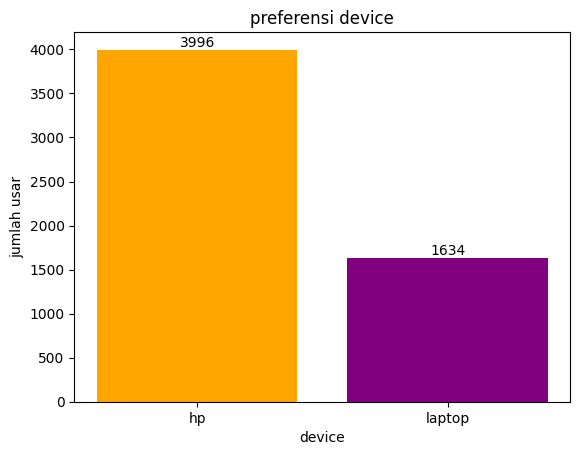

In [64]:
hp = df['PreferredLoginDevice'].loc[(df['PreferredLoginDevice']== 'Mobile Phone') | (df['PreferredLoginDevice']== 'Phone')].count()
laptop = df['PreferredLoginDevice'].loc[df['PreferredLoginDevice']== 'Computer'].count()
plt.bar(['hp', 'laptop'] ,[hp, laptop], color=['orange','purple'])
plt.xlabel('device')
plt.ylabel('jumlah usar')
plt.title('preferensi device')
for i, v in enumerate([hp, laptop]):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

insight: Diketahui bahwa sebagian besar user menggunakan hp daripada laptop. insight ini dapat digunakan dalam optmalisasi tampilan iklan serta penenmpatan dari produk recomended yang menyesuaikan dengan ukuran hp

In [65]:
# karena ada ambigu pada value phone dan mobile phone, maka value tersebut dijadikan satu
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

## 4.2 pesebaran durasi penggunaan aplikasi

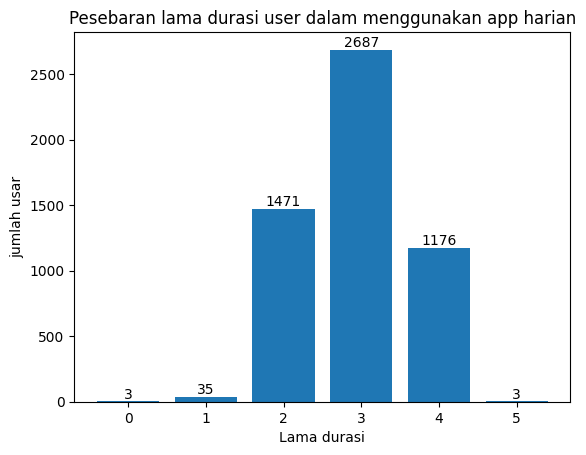

In [66]:
"""
karena hendak melakukan dropna(), sehingga dibuat variabel baru,
hal ini dilakukan karena handling mising value akan dilakukan di feature engineering
karena handling missing value butuh analisis lebih dibandingkan saat di data loading
"""
eda42 = df['HourSpendOnApp'].copy() 
eda42.dropna(inplace=True)          

eda42_value=[]
list_eda42 = range(6)

for i in list_eda42: 
    count = eda42.loc[eda42 == i].count() 
    eda42_value.append(count)

plt.bar(list_eda42,eda42_value)
plt.xlabel('Lama durasi')
plt.ylabel('jumlah usar')
plt.title('Pesebaran lama durasi user dalam menggunakan app harian')
for i in list_eda42:
    plt.text(list_eda42[i],eda42_value[i], str(eda42_value[i]), ha='center', va='bottom')
plt.show()    

In [108]:
df['HourSpendOnApp'].describe()

count    5375.000000
mean        2.931535
std         0.721926
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

Insight: Rata-rata User menghabiskan waktunya untuk membuka aplikasi ialah 2.9 jam. Hanya sebagian kecil dari mereka yang menggunakanya diatas 5 jam. Hal ini dapat dimanfaatkan sebagai landasan dalam pembuatan rencana notifikasi, customer journey, serta penayangan promo. Supaya waktu yang digunakan oleh user semakin effisien bagi user untuk memenuhi kebutuhanya dan bagi perusahaan untuk meningkatkan adanya atransaksi di ecomerce nya.

## 4.3 Pesebaran Tier Kota dari user

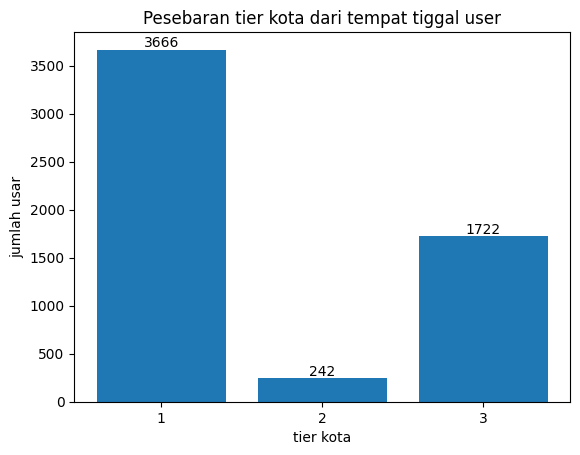

In [67]:
tier_city=[]
tc_list = [1,2,3]

for i in tc_list: 
    count = df['CityTier'].loc[df['CityTier'] == i].count() 
    tier_city.append(count)

plt.bar(tc_list,tier_city)
plt.xlabel('tier kota')
plt.ylabel('jumlah usar')
plt.title('Pesebaran tier kota dari tempat tiggal user')
plt.xticks(tc_list)
for i in range(3):
    plt.text(tc_list[i],tier_city[i], str(tier_city[i]), ha='center', va='bottom')
plt.show()


insight: Sebagian user bertempat tinggal di kota dengan tier 1, tempat tinggal bisa jadi pertimbangann dari segi geographic dalam clustering, orang yang bertempat tinggal pada tier kota yang sama kemungkinan akan memiliki sifat dan prilaku yang sama, sehingga dapat diberikan treatment berupa iklan, promo, peringatan hari besar yang sama.

## 4.4 Pesebaran jumlah cashback yang didapatkan user bulan lalu

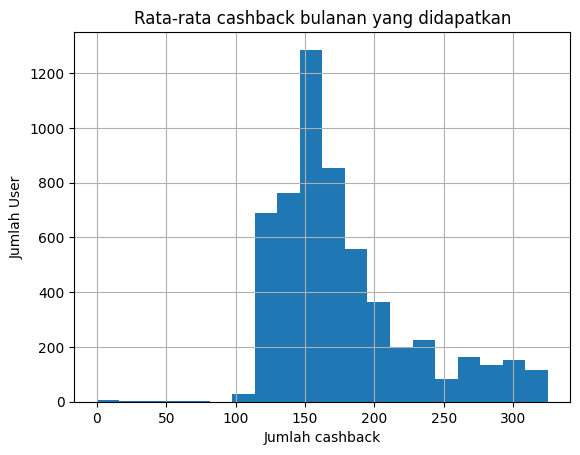

In [68]:
plt.hist(df['CashbackAmount'], bins=20)
plt.xlabel('Jumlah cashback')
plt.ylabel('Jumlah User')
plt.title('Rata-rata cashback bulanan yang didapatkan')
plt.grid()
plt.show()

insight: User memiliki cash back yang tersebar dari nilai 0 hingga lebih dari 300 dollar. Informasi mengenai nilai cashback yang dimiliki customer ini akan menjadi informasi yang bermanfaat ketika dibandingkan dengan variabel-variabel lain nantinya. 

## 4.5 Perbandingan Jumlah User yang Colmpain dan Tidak Complain

Text(0.5, 1.0, 'pelanggan yang melakukan churn')

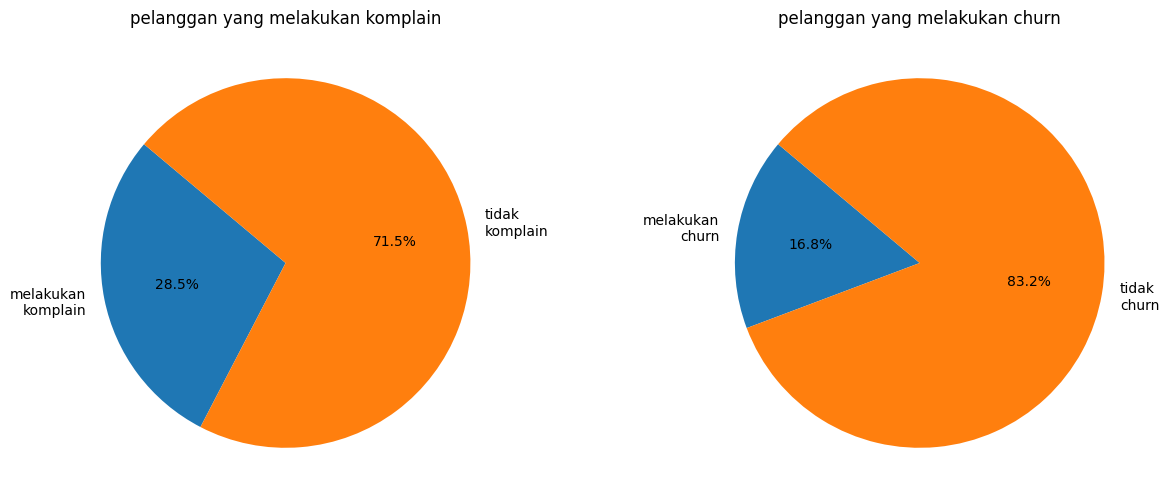

In [69]:
komplain = df['Complain'].loc[df['Complain']== 1].count()
tidak_komplain = df['Complain'].loc[df['Complain']== 0].count()
churn = df['Churn'].loc[df['Churn']== 1].count()
tidak_churn = df['Churn'].loc[df['Churn']== 0].count()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie([komplain, tidak_komplain], labels=['melakukan\nkomplain', 'tidak\nkomplain'], autopct='%1.1f%%', startangle=140)
plt.title('pelanggan yang melakukan komplain')

plt.subplot(1, 2, 2)
plt.pie([churn, tidak_churn], labels=['melakukan\nchurn', 'tidak\nchurn'], autopct='%1.1f%%', startangle=140)
plt.title('pelanggan yang melakukan churn')

insight: informasi mengenai perbandingan user yang melakukan complain dengan user yang tidak melakukan komplain akan mempermudah kita dalam mendeteksi akan adanya churn atau tidak. Terlebih lagi, user yang complain memiliki pola yang mirip dengan user yang melakukan churn. Bisa jadi pada uji korelasi user komplain dan user churn akan memiliki korelasi yang tinggi.

## 4.6 Categori order

In [70]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

Pada kolom kategori order, ada double antara mobile dan mobile phone, maka akan disatukan

In [71]:
df['PreferedOrderCat']= df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

# 5. Feature Engineering

## 5.1 Feature Selection

### Pemisahan tipe data

In [72]:
# Pada kode ini, data dikelompokan berdasarkan tipe datanya, Sehingga tidak dikelompokan berdasarkan kategorical dan numerical
# Alasan tersebut karena pada kolom target (churn) merupakan kolom kategorical (1 dan 0) sehingga seluruh kegiatan uji korelasi menggunakan kendall
# Kolom yang bertipe object dipisah karena akan menggunakan kodingan yang berbeda

data_object = df.select_dtypes(include='object')
data_int_float = df[df.select_dtypes(include= np.number).columns.tolist()]
data_int_float.drop(['CustomerID'], axis=1, inplace=True)

C:\Users\Yobi Aditias\AppData\Local\Temp\ipykernel_15044\2812056753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_int_float.drop(['CustomerID'], axis=1, inplace=True)


### Data bertipe int dan float

<Axes: >

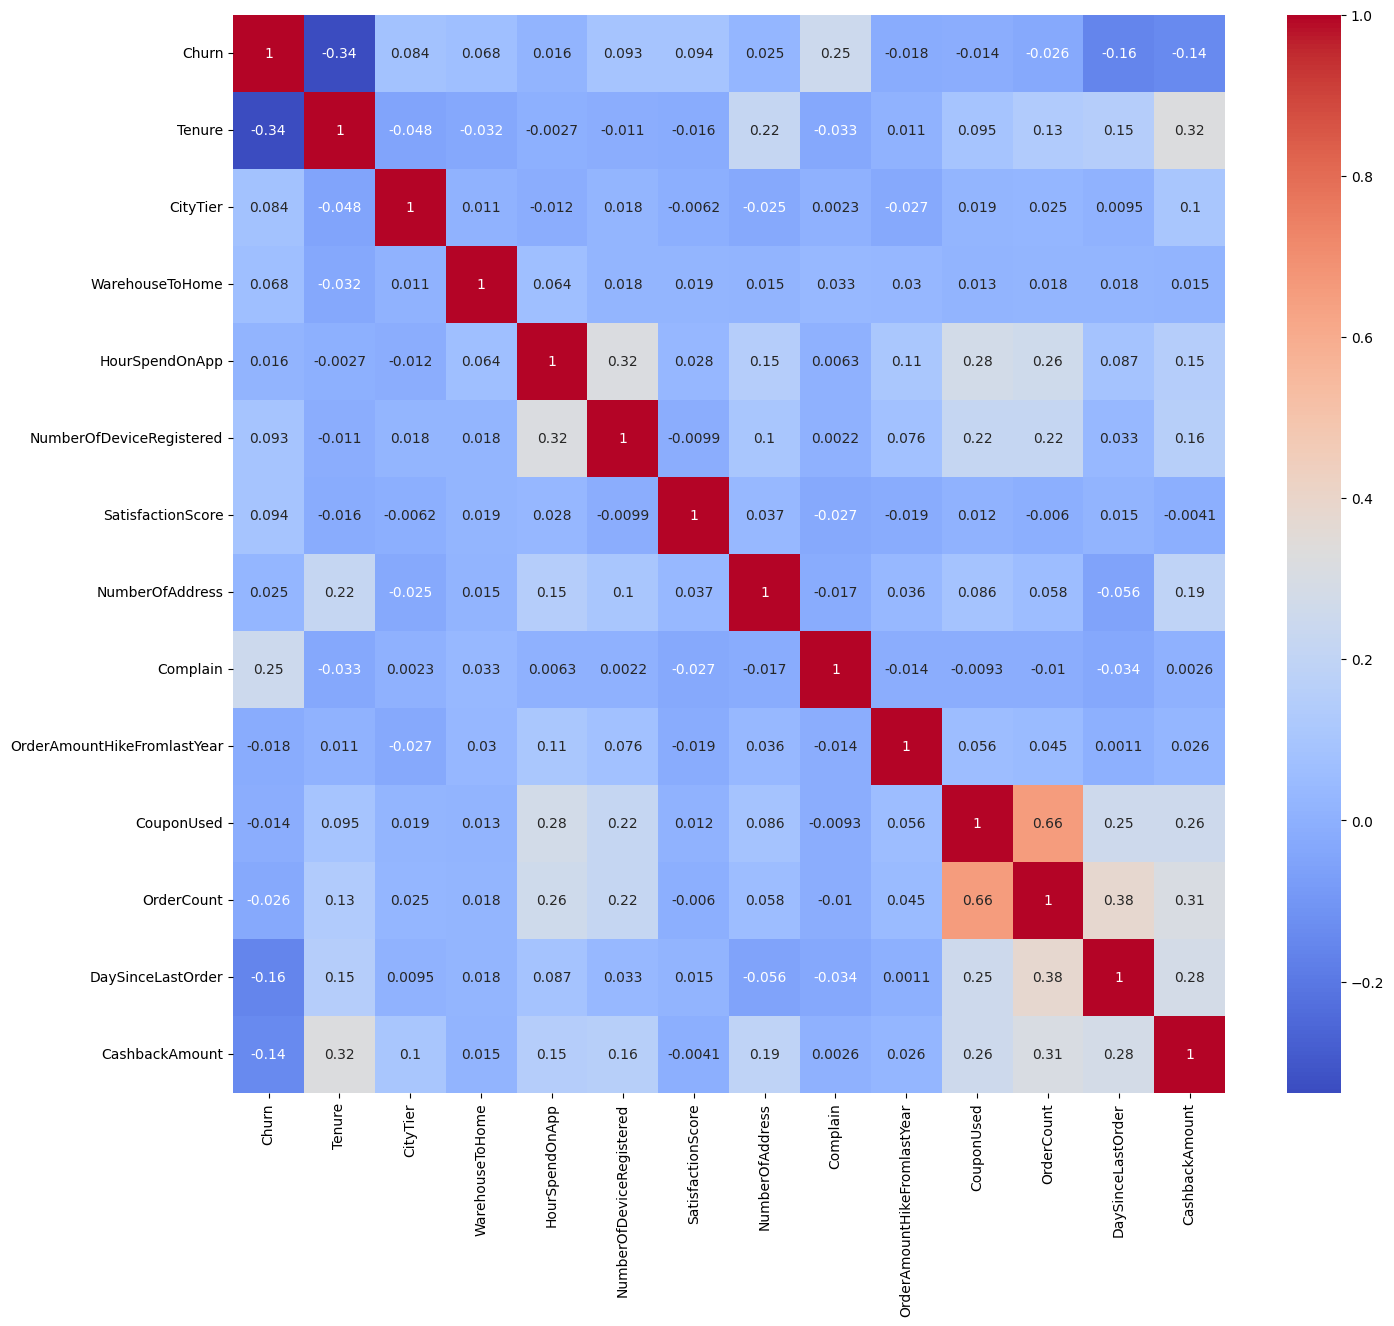

In [73]:
plt.figure(figsize=(16, 14))
sns.heatmap(data_int_float.corr(method='kendall'), annot=True, cmap='coolwarm')

keterangan

### data bertipe object

In [74]:
sekor = []
for kolom in data_object:
    kendall_corr, p_value = stats.kendalltau(df['Churn'], df[kolom])
    sekor.append((kolom, kendall_corr, p_value))
for i in sekor:
    kolom, kendall_corr, p_value = i
    print(f"{kolom}:\nKorelasi Kendall: {kendall_corr}\nP-Value: {p_value}\n")

PreferredLoginDevice:
Korelasi Kendall: -0.05109907123962243
P-Value: 0.0001261824705431

PreferredPaymentMode:
Korelasi Kendall: 0.0012574063112009532
P-Value: 0.9172510672177588

Gender:
Korelasi Kendall: 0.029263565350544304
P-Value: 0.02812433858502416

PreferedOrderCat:
Korelasi Kendall: 0.12963577117724356
P-Value: 6.059458426207512e-26

MaritalStatus:
Korelasi Kendall: 0.1424865118101859
P-Value: 5.08037790405733e-29



In [75]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Pemilihan Fitur

Fitur yang dipilih merupakan fitur yang nilai korelasinya berada diatas 10% dan total jumlah fiturnya ialah 6 fitur. Namun tedapat dua fitur yang nilainya mendekati 10% yaitu fitur skor kepuasan (SatisfactionScore) dan jumlah device yang diregstrasi (NumberOfDeviceRegistered). Dengan pertimbangan bahwa diasumsikan kedua fitur tersebut membawa informasi yang kemungkinan dapat digunakan, maka diputuskan untuk mengikutkan kedua fitur tersebut dan jumlah fiturnya sekarang ialah 8 fitur.

In [77]:
fitur = df[['Tenure', 'NumberOfDeviceRegistered' ,'SatisfactionScore', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'PreferedOrderCat', 'MaritalStatus', 'Churn']].copy()
fitur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    5366 non-null   float64
 1   NumberOfDeviceRegistered  5630 non-null   int64  
 2   SatisfactionScore         5630 non-null   int64  
 3   Complain                  5630 non-null   int64  
 4   DaySinceLastOrder         5323 non-null   float64
 5   CashbackAmount            5630 non-null   int64  
 6   PreferedOrderCat          5630 non-null   object 
 7   MaritalStatus             5630 non-null   object 
 8   Churn                     5630 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 396.0+ KB


Dari keseluruhan fitur yang dipilih terbagi atas 2 kolom nominal, 3 ordinal, dan 3 numeric 
- kolom nominal berupa marital status dan preferensi kategori order ('PreferedOrderCat')
- kolom ordinal berupa complain, jumlah device yang teregistrasi ('NumberOfDeviceRegistered'), skor kepuasan ('SatisfactionScore'),
- kolom numerical berupa Tenure, hari sejak terakhir order ('DaySinceLastOrder'), serta jumlah rata-rata cashback yang diperoleh ('CashbackAmount')

## 5.2 Handling Missing Value

### 5.2.a) Handling Missing Value: Cek Keseluruhan Mising Value

In [78]:
fitur.isna().sum()

Tenure                      264
NumberOfDeviceRegistered      0
SatisfactionScore             0
Complain                      0
DaySinceLastOrder           307
CashbackAmount                0
PreferedOrderCat              0
MaritalStatus                 0
Churn                         0
dtype: int64

In [79]:
indeks_missing = fitur[fitur.isnull().any(axis=1)].index
print('jumlah data entry :',len(indeks_missing), 'baris')

jumlah data entry : 571 baris


Karena jumlah data entry yang memiliki missing value nya sama dengan akumulasi masing-masing kolom, maka dapat disimpulkan bahwa missing value pada kedua kolom tersebut berada pada indeks yang berbeda-beda

### 5.2.b) Handling Missing Value: Fitur Tenure

Karena ada nilai 0 di kolom Tenure, sehingga tidak dapat diasumsikan bahwa missing value pada kolom Tenure ialah error dalam menginput nilai 0m maka dari itu..
Langkah pertama, cek kemiripan missing dengan nilai minimum, jika ada kesamaan maka missing value akan diisi nilai minimim.

In [80]:
a = fitur.loc[fitur['Tenure'].isnull()].index
fitur['Churn'].loc[a].value_counts()

Churn
0    183
1     81
Name: count, dtype: int64

In [81]:
b = fitur.loc[fitur['Tenure'] ==0.].index
fitur['Churn'].loc[b].value_counts()

Churn
1    272
0    236
Name: count, dtype: int64

pada nilai 0 di kolom Tenure, pesebaranya ialah merata antara kelas churn dan tidak churn, sedangkan pada pada missing value nilainya tidak merata, maka tidak akan diganti dengan 0

langkah kedua cek dengan nilai modus

In [82]:
modus = fitur['Tenure'].mode()[0]
print('modus', modus)
d = fitur.loc[fitur['Tenure'] ==modus].index
print(fitur['Churn'].loc[d].value_counts())

modus 1.0
Churn
1    349
0    341
Name: count, dtype: int64


Pada kolom Tenure yang mengandung nilai modus, pesebaran antara churn dan tidak juga merata, pada kondisi ini terdapat dua pilihan, mengisi dengan nilai modus ataupun menghilangkan barisnya. Namun karena korelasi nilai antara Tenure dan Churn lebih dari 30% atau dianggap memberikan pengaruh yang besar, maka diambil keputusan untuk meng-handling missing value ialah dengan menghapus entry data tersebut untuk menghindari bias terhadap kejadian nyata

In [83]:
fitur.dropna(subset=['Tenure'], inplace=True)

### 5.2.c) Handling Missing Value: Fitur jumlah hari sejak terakhir order

beberapa chek yang dapat dilakukan ialah dengan mengecek modus, mean, minimum value dan maksimum value

In [84]:
fitur['DaySinceLastOrder'].mode()

0    3.0
Name: DaySinceLastOrder, dtype: float64

In [85]:
d = fitur.loc[fitur['DaySinceLastOrder'].isnull()].index
fitur['Churn'].loc[d].value_counts()

Churn
0    253
1     54
Name: count, dtype: int64

In [86]:
e = fitur.loc[fitur['DaySinceLastOrder'] ==3.0].index
fitur['Churn'].loc[e].value_counts()

Churn
0    749
1    126
Name: count, dtype: int64

pada fittur ini, data entry yang nilainya 3.0 atau modus memiliki kesamaan sifat ketika nilainya ialah null, keterangan ini dinilai sudah cukup untuk mengambil keputusan bahwa handling missing value pada kolom ini ialah dengan mengisi nilai modus atau nilai 3.0

In [87]:
fitur['DaySinceLastOrder'].replace(np.nan, 3.0, inplace=True)

## 5.3 Chek Cardinality

In [88]:
cekcardi = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain', 'PreferedOrderCat', 'MaritalStatus']
for i in cekcardi:
    print('jumlah nilai unique value : ',len(fitur[i].unique()))

jumlah nilai unique value :  6
jumlah nilai unique value :  5
jumlah nilai unique value :  2
jumlah nilai unique value :  5
jumlah nilai unique value :  3


Tidak ada data yang cardinality

## 5.4 Check Vif

In [89]:
X = fitur[['Tenure', 'DaySinceLastOrder', 'CashbackAmount']]

X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            Variable        VIF
0              const  15.135346
1             Tenure   1.295998
2  DaySinceLastOrder   1.095719
3     CashbackAmount   1.374946


## 5.5 Spliting data

In [90]:
X = fitur.drop(['Churn'], axis = 1)
y = fitur['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
print('y train size', y_train.shape)
print('y Test size', y_test.shape)


Train size (4292, 8)
Test size (1074, 8)
y train size (4292,)
y Test size (1074,)


## 5.6 Handling Outlier

In [91]:
for i in ['Tenure','DaySinceLastOrder', 'CashbackAmount']:
    skewness = fitur[i].skew()
    print(f"Skewness dari {i} adalah {skewness}")

Skewness dari Tenure adalah 0.7365133838993447
Skewness dari DaySinceLastOrder adalah 1.2644006987210916
Skewness dari CashbackAmount adalah 1.1486438122412665


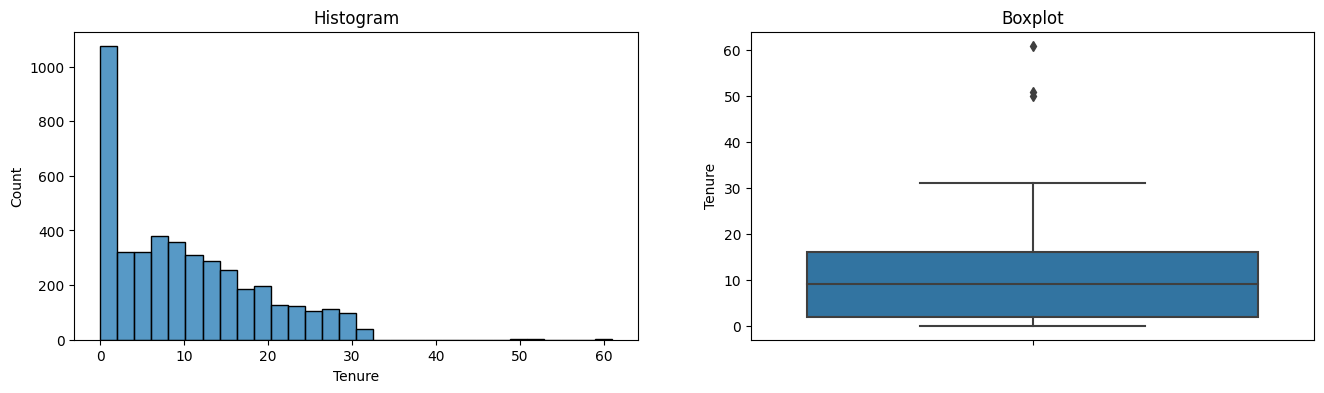

In [92]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.histplot(X_train['Tenure'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Tenure'])
plt.title('Boxplot')

plt.show()

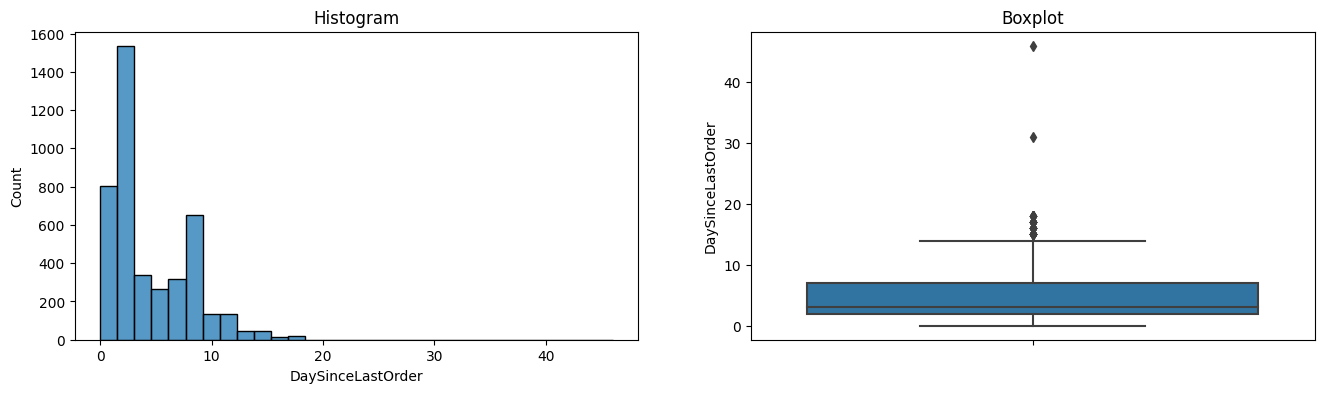

In [93]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.histplot(X_train['DaySinceLastOrder'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['DaySinceLastOrder'])
plt.title('Boxplot')

plt.show()

In [94]:
skeww = Winsorizer(capping_method='iqr',tail='both',fold=1.5,)
X_train['Tenure'] = skeww.fit_transform(X_train[['Tenure']])

extreme = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['DaySinceLastOrder', 'CashbackAmount']) #dibuat sama 1.5 karena pada 3.0 outlier tersebut belum hilang
X_train[['DaySinceLastOrder', 'CashbackAmount']] = extreme.fit_transform(X_train[['DaySinceLastOrder', 'CashbackAmount']])

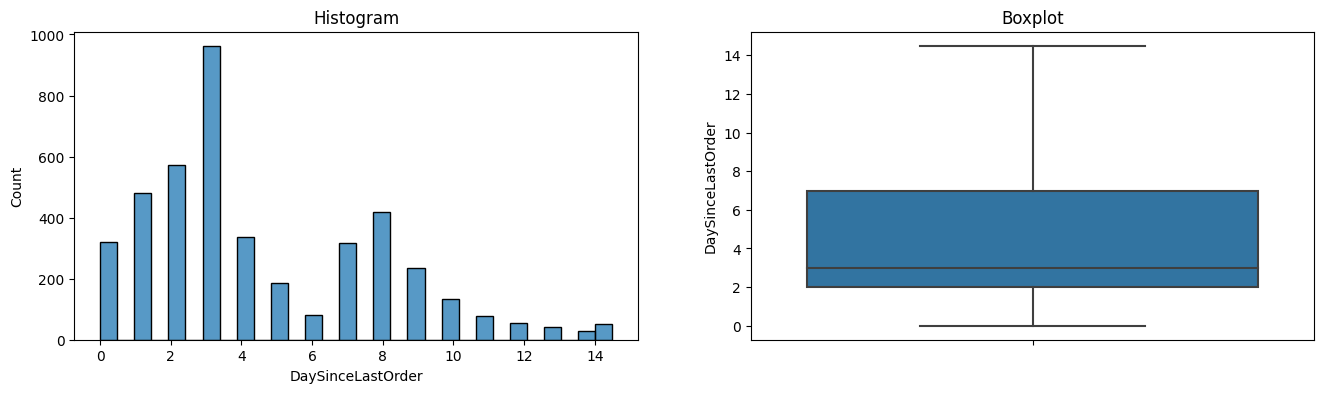

In [95]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.histplot(X_train['DaySinceLastOrder'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['DaySinceLastOrder'])
plt.title('Boxplot')

plt.show()

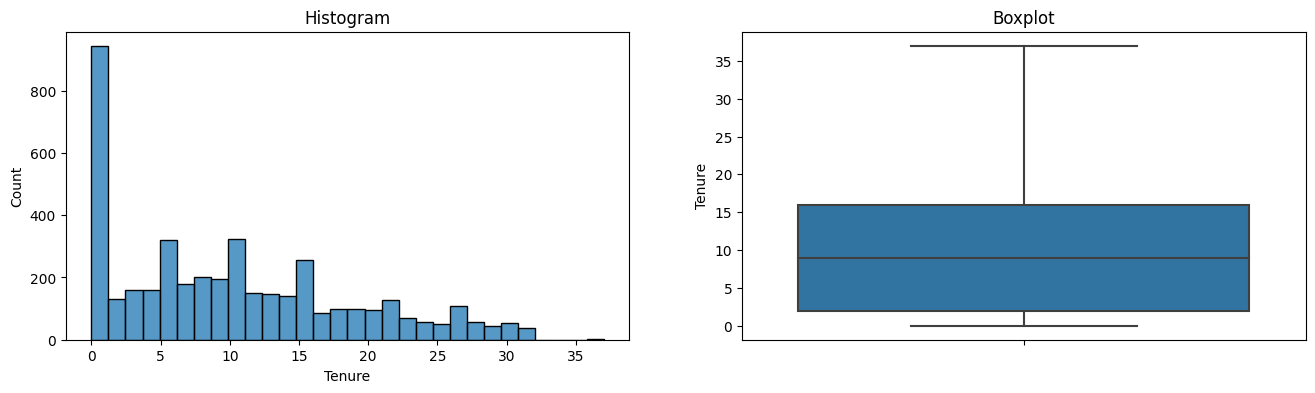

In [96]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
sns.histplot(X_train['Tenure'], bins=30)
plt.title('Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(y=X_train['Tenure'])
plt.title('Boxplot')

plt.show()

In [128]:
fitur.columns

Index(['Tenure', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferedOrderCat',
       'MaritalStatus', 'Churn'],
      dtype='object')

In [131]:
fitur['Complain'].unique()

array([1, 0], dtype=int64)

# 6 Pipeline: encoding, scaling, modeling, training, crossvalidating

In [97]:
numeric_features = ['Tenure','DaySinceLastOrder', 'CashbackAmount']
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ["MaritalStatus", "PreferedOrderCat"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

ordinal_features = ['NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain']
ord_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("ord",ord_transformer,ordinal_features)
    ]
)

models = [
    ("Logistic Regression", Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=100000000))
    ])),
    ("K-Nearest Neighbors", Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", KNeighborsClassifier())
    ])),
    ("Support Vector Machine", Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", SVC())
    ])),
    ("Decision Tree", Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier())
    ])),
    ("Random Forest", Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier())
    ])),
    ("Gradient Boosting", Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier())
    ]))
]

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    print(f"{name}: {scores}\nMean f1 = {scores.mean()}, Std Deviation = {scores.std()}\n")


Logistic Regression: [0.50458716 0.42307692 0.59292035 0.45098039 0.48847926]
Mean f1 = 0.4920088175704401, Std Deviation = 0.05794609271708642

K-Nearest Neighbors: [0.46428571 0.47747748 0.59555556 0.52914798 0.46846847]
Mean f1 = 0.5069870395699992, Std Deviation = 0.05002676713856788



Support Vector Machine: [0.49246231 0.40414508 0.57004831 0.45918367 0.44897959]
Mean f1 = 0.47496379275257256, Std Deviation = 0.05529329920530501

Decision Tree: [0.80427046 0.78767123 0.80267559 0.73454545 0.71232877]
Mean f1 = 0.7682983004926374, Std Deviation = 0.037743735753117444

Random Forest: [0.75675676 0.72440945 0.82527881 0.78431373 0.78326996]
Mean f1 = 0.7748057406903917, Std Deviation = 0.033391997961158854

Gradient Boosting: [0.65271967 0.56540084 0.66403162 0.5982906  0.60759494]
Mean f1 = 0.6176075329413284, Std Deviation = 0.03629598373809753



Hasil Cross Validasi yang paling tinggi ialah pada random Forest. Maka Random Forest akan dilakukan Hyper parameter Tuning

# 7. Pipeline: Hyperparameter Tuning dengan model terbaik (Random Forest)

In [103]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Hyperparameter Terbaik:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Hyperparameter Terbaik:
classifier__max_depth: 20
classifier__min_samples_leaf: 1
classifier__min_samples_split: 2
classifier__n_estimators: 100


# 8. Evaluasi menggunakan Parameter Terbaik

In [107]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

print("Matriks Konfusi:")
print(confusion_matrix(y_test, y_pred))

Akurasi: 0.94
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       900
           1       0.85      0.80      0.82       174

    accuracy                           0.94      1074
   macro avg       0.90      0.89      0.89      1074
weighted avg       0.94      0.94      0.94      1074

Matriks Konfusi:
[[875  25]
 [ 35 139]]


# 9. Model Saving

In [123]:
with open('modelML.pkl', 'wb') as file_1:
  pickle.dump(best_model, file_1)


# 10. Data Inference

Data inference berada pada file "testing_to_Inference_data.ipynb"

# 11. Kesimpulan dan menjawan pertanyaan

Kesimpulan:

dari segi model dan data:
Dari segi model, model ini sudah cukup baik dimana f1 scorenya sudah cukup tinggi. Datanya juga tidak terlalu buruk, ada beberapa missing value yang sebagian diisi dengan nilai modus dan sebagian lainya di drop sesuai dengan domain casenya. Kelemahan dari model ini ialah f1 score pada kelas 1 masih cukup rendah, sehingga model lebih cenderung mengarah ke nilai 0.

dari segi bisnis:
Dari segi bisnis, user churn ada kaitanya erat dengan komplain, yaitu 25 perse, sehingga langkah awal sebelum dilakukan prediksi dengan model, dapat diliat mengenai prilaku komplain oleh user sebagai langkah awal. Selain itu tenur juga memiliki pengaruh yang besar terhadap churn. user yang telah lama bergabung dengan e-commerce cenderung akan setia pada brand ini. Ada beberapa variabel penting dalam bisnis yang memiliki korelasi yang kecil terhadap churn sepert jumlah kupon digunakan dan jumlah orderan. dari variabel kupon yang telah digunakan oleh konsumen, ini menandakan bahwa perusahaan belum maksimal dalam memanfaatkan kupon ataupun promo. Ada kemungkinan bahwa user yang beralih ke brand lain disebabkan karena mereka mendapatkan kupon ataupun diskon yang lebih baik disana.


Menjawab pertanyaan:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
3. Jelaskan apa yang dimaksud dengan Cross Validation !

jawab: 
1. Bagging merupakan teknik ensemble learning yang dikembangkan untuk meningkatkan performa model prediksi.\
Dari segi cara kerjanya:\
Bagging pertama-tama melakukan pengambilan sampel dengan penggantian (bootstrap sampling) dari dataset pelatihan asli. Ini berarti setiap dataset bootstrap baru yang dihasilkan mungkin berbeda dari yang lain karena beberapa sampel dapat muncul beberapa kali dan yang lain mungkin tidak muncul sama sekali. Oleh karena itu, setiap dataset bootstrap adalah variasi dari dataset asli.\
Pada setiap dataset bootstrap yang dihasilkan, model pembelajaran yang sama (misalnya, pohon keputusan) dilatih secara independen. Ini berarti kita memiliki beberapa model yang memiliki variasi karena dataset bootstrap yang berbeda.\
Setelah semua model terlatih, Bagging mengambil prediksi dari masing-masing model dan menggabungkannya. Ini biasanya dilakukan dengan menghitung rata-rata (untuk regresi) atau menggunakan mayoritas suara (voting) untuk klasifikasi. Hasil akhir adalah prediksi gabungan dari semua model.
2. perbedaan algoritma random forrest dengan metode bagging terbagi dalam hal:\
pertama dari cara Ensemble: Random Forest menggunakan metode boosting, di mana setiap model dibangun secara independen pada dataset bootstrap yang berbeda, dan prediksi mereka digabungkan. Sementara itu, algoritma Boosting seperti AdaBoost atau Gradient Boosting membangun model secara adaptif, memberi bobot lebih pada sampel yang salah diklasifikasikan pada iterasi sebelumnya.\
Ketidakseimbangan: Random Forest umumnya lebih baik menangani ketidakseimbangan kelas secara alami karena menggunakan dataset bootstrap. Di sisi lain, Boosting secara adaptif memberi bobot lebih pada kelas minoritas.\
Kompleksitas Model: Random Forest biasanya lebih kuat dalam mengatasi overfitting karena model-model yang terlatih pada dataset bootstrap berbeda, sedangkan Boosting rentan terhadap overfitting karena ada peningkatan iteratif pada model yang ada.\
Kompleksitas Waktu: Random Forest bisa lebih cepat karena model-modelnya bisa dilatih secara independen dan paralel, sementara Boosting membutuhkan iterasi yang berurutan, yang mungkin lebih lambat.\
3. Cross validation merupakan sebuah metode untuk melakukan uji dari data train dengan data validation. Penggunaan data validation ialah supaya data test tidak mengalami lackage atau kebocoran. cross validasi membagi kelas pada masing-masing kolom atau fitur sehingga kolom yang tidak terbagi kelasnya di iterasi pertama berkemungkinan akan terbagi di iterasi berikutnya sehingga lebih merata. cross validasi dilakukan lebih dari satu kali iterasi dengan data train dan data validasi yang saling ditukar-tukar.\